In [ ]:
import tensorflow as tf

from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam, Nadam

import nltk
from nltk.corpus import stopwords

import numpy as np 
import matplotlib.pyplot as plt
import urllib
import random

In [ ]:
url = "https://raw.githubusercontent.com/ardauzunoglu/yapay-sair/main/orhan-veli-kanik.txt"

nltk.download('stopwords')
StopWords = stopwords.words('turkish')
punctuation = ["!", "#", "$", "%", "&", "'", "(", ")", "*", "+", ",", "-", ".", "/", ":", ";", "<", "=", ">", "?", "@", "[", "^", "_", "`", "{", "|", "}", "~", "1", "2", "3", "4", "5", "6", "7", "8", "9", "0"]

additions = ["mi", "mu", "mı", "mü", "misiniz", "mısınız", "müsünüz", "musunuz", "mudur", "musun", "müsün", "misin"]
for addition in additions:
  StopWords.append(addition)

data_file = urllib.request.urlopen(url)
data = ""

cleaned_stopwords = []

for line in data_file:
  line = line.decode("utf-8").replace("\r", "").replace("\n", "")
  cleaned_line = ""
  
  for char in line:
    if char not in punctuation:
      cleaned_line += char

  for word in cleaned_line.split():
    if word.lower() not in StopWords:
      data += word
      data += " "

    else:
      if word not in cleaned_stopwords:
        cleaned_stopwords.append(word)


  data += "\n"

print(data)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
Ağlasam sesimi duyar 
Mısralarımda 
Dokunabilir 
Göz yaşlarıma ellerinizle 
Bilmezdim şarkıların kadar güzel 
Kelimelerinse kifayetsiz olduğunu 
derde düşmeden önce 
Bir yer var biliyorum 
şeyi söylemek mümkün 
Epeyce yaklaşmışım duyuyorum 
Anlatamıyorum 

İstanbulu dinliyorum gözlerim kapalı 
Önce hafiften bir rüzgar esiyor 
Yavaş yavaş sallanıyor 
Yapraklar ağaçlarda 
Uzaklarda uzaklarda 
Sucuların durmayan çıngırakları 
İstanbulu dinliyorum gözlerim kapalı 
İstanbulu dinliyorum gözlerim kapalı 
Kuşlar geçiyor derken 
Yükseklerden sürü sürü çığlık çığlık 
Ağlar çekiliyor dalyanlarda 
Bir kadının suya değiyor ayakları 
İstanbulu dinliyorum gözlerim kapalı 
İstanbulu dinliyorum gözlerim kapalı 
Serin serin Kapalıçarşı 
Cıvıl cıvıl Mahmutpaşa 
Güvercin dolu avlular 
Çekiç sesleri geliyor doklardan 
Güzelim bahar rüzgarında ter kokuları 
İstanbulu dinliyorum gözlerim kapalı 
İst

In [ ]:
tokenizer = Tokenizer()

corpus = data.lower().split("\n")

tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

print(tokenizer.word_index)
print(total_words)

{'bir': 1, 'kadar': 2, 'güzel': 3, 'gün': 4, 'ben': 5, 'değil': 6, 'var': 7, 'böyle': 8, 'deniz': 9, 'artık': 10, 'zaman': 11, 'içinde': 12, 'beni': 13, 'sen': 14, 'başka': 15, 'benim': 16, 'gelir': 17, 'birdenbire': 18, 'dolu': 19, 'ey': 20, 'mavi': 21, 'kapalı': 22, 'bütün': 23, 'öyle': 24, 'yine': 25, 'karşı': 26, 'oldu': 27, 'akşam': 28, 'i̇stanbulu': 29, 'dinliyorum': 30, 'gözlerim': 31, 'bana': 32, 'onun': 33, 'kiminiz': 34, 'sizin': 35, 'bedava': 36, 'ah': 37, 'gece': 38, 'olur': 39, 'bak': 40, 'hoş': 41, 'sabah': 42, 'insan': 43, 'onu': 44, 'fakat': 45, 'güneş': 46, 'yok': 47, 'sonra': 48, 'biliyorum': 49, 'kuşlar': 50, 'bahar': 51, 'ay': 52, 'gel': 53, 'seni': 54, 'giden': 55, 'dünya': 56, 'yalnız': 57, 'hala': 58, 'üzerine': 59, 'eski': 60, 'beyaz': 61, 'doğuyor': 62, 'yağmur': 63, 'yaz': 64, 'aynı': 65, 'şarkı': 66, 'bin': 67, 'havalarda': 68, 'şiir': 69, 'senin': 70, 'dersin': 71, 'ölüm': 72, 'sesi': 73, 'son': 74, 'çocuk': 75, 'yolculuk': 76, 'rüzgar': 77, 'vakti': 78, 'al

In [ ]:
input_sequences = []
for line in corpus:
	token_list = tokenizer.texts_to_sequences([line])[0]
	for i in range(1, len(token_list)):
		n_gram_sequence = token_list[:i+1]
		input_sequences.append(n_gram_sequence)
 
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

xs, labels = input_sequences[:,:-1],input_sequences[:,-1]

ys = tf.keras.utils.to_categorical(labels, num_classes=total_words)

In [ ]:
model = Sequential()
model.add(Embedding(total_words, 75, input_length=max_sequence_len-1))
model.add(Bidirectional(LSTM(100)))
model.add(Dense(total_words, activation='softplus'))
adam = Nadam(lr=0.0125)
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])

history = model.fit(xs, ys, epochs=100, verbose=1)

print(model)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/100
128/128 [==============================] - 4s 9ms/step - loss: 8.0515 - accuracy: 0.0205
Epoch 2/100
128/128 [==============================] - 1s 9ms/step - loss: 7.2604 - accuracy: 0.0335
Epoch 3/100
128/128 [==============================] - 1s 9ms/step - loss: 6.1280 - accuracy: 0.0511
Epoch 4/100
128/128 [==============================] - 1s 9ms/step - loss: 4.6531 - accuracy: 0.1283
Epoch 5/100
128/128 [==============================] - 1s 9ms/step - loss: 3.1126 - accuracy: 0.2849
Epoch 6/100
128/128 [==============================] - 1s 9ms/step - loss: 1.7341 - accuracy: 0.5655
Epoch 7/100
128/128 [==============================] - 1s 9ms/step - loss: 0.9741 - accuracy: 0.7532
Epoch 8/100
128/128 [==============================] - 1s 9ms/step - loss: 0.6348 - accuracy: 0.8187
Epoch 9/100
128/128 [==============================] - 1s 9ms/step - loss: 0.4849 - accuracy: 0.8394
Epoch 10/100
128/128 [==============================] - 1s 9ms/step - loss: 0.4130 - accura

In [ ]:
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.show()

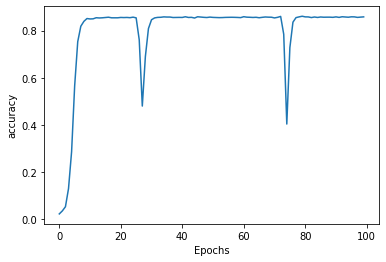

In [ ]:
plot_graphs(history, 'accuracy')


In [ ]:
def calculate_word_length(corpus):
  length_dict = {
    1:0,
    2:0,
    3:0,
    4:0,
    5:0,
    6:0,
    7:0,
    8:0,
    9:0,
    10:0,
    11:0,
    12:0
  }
  line_count = 0
  for line in corpus:
    line_count += 1
    word_length = len(line.split())
    if (word_length <= 12) and (word_length != 0):
      length_dict[word_length] += 1

  return length_dict

def calculate_line_length(data):
  length_dict = {
    1:0,
    2:0,
    3:0,
    4:0,
    5:0,
    6:0,
    7:0,
    8:0,
    9:0,
    10:0,
    11:0,
    12:0,
    13:0,
    14:0,
    15:0,
    16:0,
    17:0,
    18:0,
    19:0,
    20:0
  }
  poem_count = 0
  for poem in data.split("\n\n"):
    poem_count += 1
    line_length = len(poem.split("\n"))
    if (line_length <= 20) and (word_length != 0):
      length_dict[line_length] += 1

  return length_dict

def generate_poem(next_words, seed_text, word_length_dict, line_length_dict):
  poem = ""
  line_length_dict_length = 0
  word_length_dict_length = 0
  initial_seed_text_word_count = len(seed_text.split())
  tour = 0

  for key in word_length_dict.keys():
    word_length_dict_length += word_length_dict[key]

  while len(seed_text.split()) < next_words:
    dict_values_sum = 0
    key = 1
    random_num = random.randint(0, word_length_dict_length)

    while random_num > dict_values_sum:
      dict_values_sum += word_length_dict[key]
      key += 1

    line_length = list(word_length_dict.keys())[key]

    if (initial_seed_text_word_count != 0) or (tour < 2):

      for _ in range(line_length - initial_seed_text_word_count):

        token_list = tokenizer.texts_to_sequences([seed_text])[0]
        token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
        predicted = np.argmax(model.predict(token_list), axis=-1)
        output_word = ""
        for word, index in tokenizer.word_index.items():
          if (index == predicted) and (word != seed_text.split()[-1]):
            output_word = word
            break

        seed_text += " "
        seed_text += output_word

      seed_text += "\n"
      initial_seed_text_word_count = 0
      tour += 1

    else:

      last_line_of_poem = seed_text.split("\n")[-2] + "\n"
      
      for _ in range(line_length):
        token_list = tokenizer.texts_to_sequences([last_line_of_poem])[0]
        token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
        predicted = np.argmax(model.predict(token_list), axis=-1)
        output_word = ""
        for word, index in tokenizer.word_index.items():
          if (index == predicted) and (word != seed_text.split()[-1]):
            output_word = word
            break

        seed_text += " "
        seed_text += output_word
        last_line_of_poem += " "
        last_line_of_poem += output_word

      seed_text += "\n"
      tour += 1

  seed_text = seed_text.strip()
  seed_text = seed_text.split("\n")

  for line in seed_text:

    if line[0] != "i":
      poem += line.strip().capitalize()
      poem += "\n"

    else:
      line[0] = "İ"
      poem += line.strip()
      poem += "\n"

  line_num = len(poem.split("\n")) - len(poem.split("\n\n"))
  current_line_num = len(poem.split("\n"))

  while current_line_num <= line_num:
    random_num = random.randint(0, line_length_dict_length)
    dict_values_sum = 0
    key = 1

    while random_num > dict_values_sum:
      dict_values_sum += line_length_dict[key]
      key += 1

    poem_length = list(line_length_dict.keys())[key]

    poem = str(poem.split("\n")[:poem_length+1]) + "\n" + str(poem.split("\n")[poem_length:])

  return poem

In [ ]:
next_words = int(input("Kelime sayısı: "))
seed_text = str(input("Başlangıç: "))

word_length_dict = calculate_word_length(corpus)
line_length_dict = calculate_word_length(data)

poem = generate_poem(next_words, seed_text, word_length_dict, line_length_dict)
print(poem)
print(len(poem.replace("\n\n", " ").replace("\n", " ").split()))

Kelime sayısı: 55
Başlangıç: Her geçen gün yaşlanıyorum
Her geçen gün yaşlanıyorum olur deli içimde
Ömrünün balıklar bilmez
Havalarda nüksetti kervan ayakları
Yol çağlardı yol olsun
Dudaklarında kadar insan divan yol kesenlerin
Rüzgarında içinde kokuları
Çağlardı tanrının günü yar
Gelir oluruz kılan dünyadan
Değil miydik altından testiler
Içinde doğmadan babam bana
Dalgayı değil dünya taşır tutar
Testiler denize içinde akşamında
Balkonunun giderim güneş içeri gitmek getirilmiş

58
